In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("mercado_laboral_Colombia_scholar.csv")

In [3]:
data

,Paper Title,Year,Author,Citation,Publication,Url of paper
0,Análisis de la estructura del mercado laboral ...,2017,JR Perazzi,24,Elsevier,https://www.sciencedirect.com/science/article/...
1,[PDF][PDF] Impacto de los subsidios estatales ...,2016,S Farné,14,uexternado.edu.co,https://www.uexternado.edu.co/wp-content/uploa...
2,Estructura salarial y segmentación en el merca...,2015,DC Mesa,29,repository.urosario.edu.co,https://repository.urosario.edu.co/handle/1033...
3,El mercado laboral y el problema pensional col...,2012,H Lopez,38,econpapers.repec.org,https://econpapers.repec.org/paper/col000094/0...
4,La inclusión de las personas con discapacidad ...,2014,DM Garavito,41,repositorio.unal.edu.co,https://repositorio.unal.edu.co/handle/unal/51854
...,...,...,...,...,...,...
95,[HTML][HTML] Análisis del mercado laboral y el...,2015,R Cota,36,scielo.org.mx,http://www.scielo.org.mx/scielo.php?script=sci...
96,La realidad del empleo en la industria de los ...,2012,S Farne,13,ideas.repec.org,https://ideas.repec.org/p/col/000194/016005.html
97,Informalidad laboral y calidad del empleo en l...,2015,LA Galvis-Aponte…,21,repositorio.banrep.gov.co,https://repositorio.banrep.gov.co/handle/20.50...
98,[PDF][PDF] El desafío de pensar una política d...,2014,J Salmi,14,researchgate.net,https://www.researchgate.net/profile/Carlos-Nu...


In [4]:
data[data["Year"]<2011]

,Paper Title,Year,Author,Citation,Publication,Url of paper
31,Mercado de trabajo de Colombia: suma de partes...,4,LE Arango,38,repositorio.banrep.gov.co,https://repositorio.banrep.gov.co/handle/20.50...


In [5]:
data=data[data["Year"]>2000]
year,counts=[],[]
for i in range(2011,2022,1):
    print(i,data[data["Year"]==i]["Citation"].sum())
    year.append(i)
    counts.append(data[data["Year"]==i]["Citation"].sum())

2011 317
2012 467
2013 444
2014 445
2015 402
2016 333
2017 87
2018 56
2019 5
2020 3
2021 0


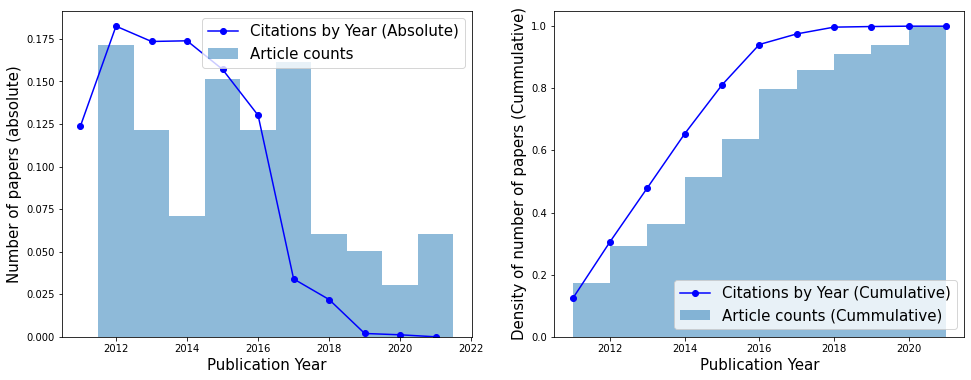

In [6]:
plt.figure(figsize=(25,6))
plt.subplot(131)
plt.hist(data["Year"],bins=10, histtype='stepfilled',alpha=0.5,density=True,align='right',label='Article counts')
plt.plot(year,counts/np.sum(counts),marker='o',color='b',label='Citations by Year (Absolute)')
plt.xlabel("Publication Year",fontsize=15)
plt.ylabel("Number of papers (absolute)",fontsize=15)
plt.legend(fontsize=15)
plt.subplot(132)
plt.hist(data["Year"],bins=10, histtype='stepfilled',alpha=0.5,cumulative=True,density=True,label='Article counts (Cummulative)')
plt.plot(year,np.cumsum(counts)/np.sum(counts),marker='o',color='b',label='Citations by Year (Cumulative)')
plt.xlabel("Publication Year",fontsize=15)
plt.ylabel("Density of number of papers (Cummulative)",fontsize=15)
plt.legend(fontsize=15)
plt.savefig('citations1.pdf',bbox_inches='tight')
plt.show()

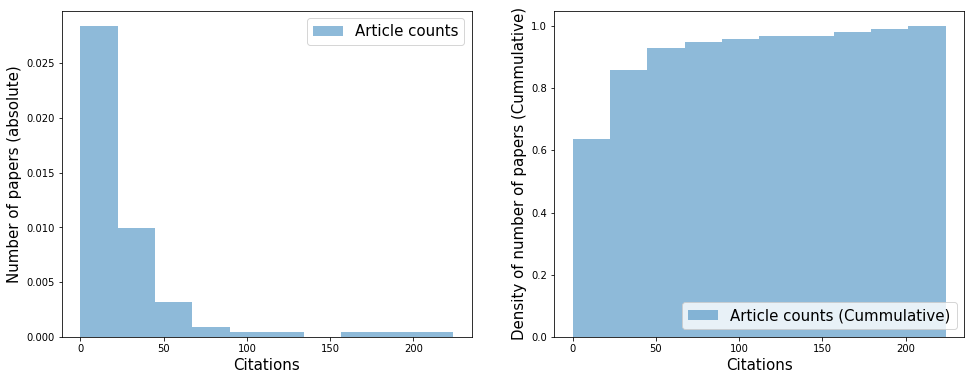

In [7]:
plt.figure(figsize=(25,6))
plt.subplot(131)
plt.hist(data["Citation"],bins=10, histtype='stepfilled',alpha=0.5,density=True,label='Article counts')
plt.xlabel("Citations",fontsize=15)
plt.ylabel("Number of papers (absolute)",fontsize=15)
plt.legend(fontsize=15)
plt.subplot(132)
plt.hist(data["Citation"],bins=10, histtype='stepfilled',alpha=0.5,cumulative=True,density=True,label='Article counts (Cummulative)')
plt.xlabel("Citations",fontsize=15)
plt.ylabel("Density of number of papers (Cummulative)",fontsize=15)
plt.legend(fontsize=15,loc=4)
plt.savefig('citations2.pdf',bbox_inches='tight')
plt.show()

In [8]:
algo,algo2=np.unique(data["Publication"],return_counts=True)

In [9]:
algo[algo2.max()]

'ideas.repec.org'

In [10]:
algo, algo2

(array(['Elsevier', 'academia.edu', 'addi.ehu.es', 'alast.info',
        'banrep.gov.co', 'bibliotecadigital.udea.edu.co',
        'ciencia.lasalle.edu.co', 'dialnet.unirioja.es',
        'econpapers.repec.org', 'econstor.eu', 'eduso.net',
        'expeditiorepositorio.utadeo.edu.co', 'ideas.repec.org',
        'lamjol.info', 'manglar.uninorte.edu.co',
        'pdfs.semanticscholar.org', 'red.uao.edu.co', 'redalyc.org',
        'repositorio.banrep.gov.co', 'repositorio.cepal.org',
        'repositorio.unal.edu.co', 'repositorio.uniandes.edu.co',
        'repositorio.unicartagena.edu.co',
        'repository.fedesarrollo.org.co', 'repository.javeriana.edu.co',
        'repository.udem.edu.co', 'repository.unimilitar.edu.co',
        'repository.urosario.edu.co', 'repository.usc.edu.co',
        'researchgate.net', 'revistas.sena.edu.co',
        'revistas.uniandes.edu.co', 'revistas.urosario.edu.co',
        'revistas.usantotomas.edu.co', 'scielo.conicyt.cl',
        'scielo.org.co', 's

In [11]:
df=data.groupby('Publication')["Citation"].nunique()

In [12]:
df

Publication
Elsevier                               1
academia.edu                           1
addi.ehu.es                            1
alast.info                             1
banrep.gov.co                          1
bibliotecadigital.udea.edu.co          1
ciencia.lasalle.edu.co                 4
dialnet.unirioja.es                    5
econpapers.repec.org                   3
econstor.eu                            1
eduso.net                              1
expeditiorepositorio.utadeo.edu.co     1
ideas.repec.org                        3
lamjol.info                            1
manglar.uninorte.edu.co                1
pdfs.semanticscholar.org               1
red.uao.edu.co                         1
redalyc.org                           11
repositorio.banrep.gov.co              6
repositorio.cepal.org                  3
repositorio.unal.edu.co                1
repositorio.uniandes.edu.co            1
repositorio.unicartagena.edu.co        2
repository.fedesarrollo.org.co         2
repo

In [127]:
from collections import Counter
algo=Counter(" ".join(data["Paper Title"]).split()).most_common(300)


In [128]:
algo

[('de', 109),
 ('en', 93),
 ('laboral', 67),
 ('y', 56),
 ('la', 55),
 ('el', 47),
 ('mercado', 46),
 ('Colombia', 44),
 ('del', 27),
 ('[PDF][PDF]', 25),
 ('los', 23),
 ('las', 15),
 ('La', 14),
 ('[HTML][HTML]', 14),
 ('un', 13),
 ('para', 13),
 ('Colombia:', 12),
 ('informalidad', 12),
 ('a', 11),
 ('análisis', 8),
 ('El', 8),
 ('empleo', 8),
 ('colombiano', 7),
 ('su', 7),
 ('laboral:', 7),
 ('género', 6),
 ('Análisis', 5),
 ('sobre', 5),
 ('principales', 5),
 ('con', 5),
 ('participación', 5),
 ('profesionales', 5),
 ('Determinantes', 5),
 ('desde', 5),
 ('por', 4),
 ('personas', 4),
 ('una', 4),
 ('Colombia,', 4),
 ('oferta', 4),
 ('e', 4),
 ('impacto', 4),
 ('mujer', 4),
 ('Un', 4),
 ('trabajo', 4),
 ('Participación', 4),
 ('situación', 4),
 ('al', 4),
 ('estudio', 3),
 ('Sensibilidad', 3),
 ('migrantes', 3),
 ('internos', 3),
 ('condiciones', 3),
 ('ciudades', 3),
 ('efecto', 3),
 ('Mercado', 3),
 ('período', 3),
 ('sus', 3),
 ('política', 3),
 ('¿', 3),
 ('o', 3),
 ('urbano', 

In [148]:
algo2=pd.Series(' '.join(data["Paper Title"]).lower().split()).value_counts()[:100]

In [149]:
vec2=np.array(algo2.values)
vec1=np.array(algo2.keys())

In [150]:
vec1,vec2

(array(['de', 'en', 'laboral', 'la', 'y', 'el', 'mercado', 'colombia',
        'del', '[pdf][pdf]', 'los', 'un', 'las', '[html][html]', 'para',
        'informalidad', 'análisis', 'colombia:', 'a', 'participación',
        'empleo', 'colombiano', 'su', 'sobre', 'laboral:', 'género',
        'impacto', 'trabajo', 'una', 'determinantes', 'profesionales',
        'desde', 'con', 'principales', 'colombia,', 'situación',
        'segmentación', 'mujer', 'e', 'estudio', 'reforma', 'al', 'efecto',
        'política', 'oferta', 'personas', 'por', 'estructura', 'sus',
        '2016', 'relación', 'modelo', 'período', 'educación', 'internos',
        'calidad', 'colombiana', 'sector', 'desarrollo', 'áreas',
        'efectos', '¿', 'social', 'migrantes', 'ley', 'laborales',
        'maternidad', 'sensibilidad', 'enfoque', 'ingresos', 'urbano',
        'américa', 'condiciones', 'ciudades', 'realidad', 'mecanismo',
        'departamento', 'o', 'mercados', 'responsabilidad', 'posgrados',
        'sal

In [151]:
vec3=[]
for i in vec1:
    ii=len(i)>=4
    vec3.append(ii)

In [152]:
mas=pd.DataFrame(np.array([vec1,vec2,vec3]).T)

In [159]:
mas[mas[2]==True][0:50][0].values

array(['laboral', 'mercado', 'colombia', '[pdf][pdf]', '[html][html]',
       'para', 'informalidad', 'análisis', 'colombia:', 'participación',
       'empleo', 'colombiano', 'sobre', 'laboral:', 'género', 'impacto',
       'trabajo', 'determinantes', 'profesionales', 'desde',
       'principales', 'colombia,', 'situación', 'segmentación', 'mujer',
       'estudio', 'reforma', 'efecto', 'política', 'oferta', 'personas',
       'estructura', '2016', 'relación', 'modelo', 'período', 'educación',
       'internos', 'calidad', 'colombiana', 'sector', 'desarrollo',
       'áreas', 'efectos', 'social', 'migrantes', 'laborales',
       'maternidad', 'sensibilidad', 'enfoque'], dtype=object)